# Import Library

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

# Load Dataset

Link Dataset : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data

In [62]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [63]:
print(train_data.shape)
print(test_data.shape)

(2000, 21)
(1000, 21)


# EDA

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [65]:
# memisahkan categorical feature dan numerik feature
categorical = ['three_g','touch_screen', 'wifi', 'four_g', 'dual_sim', 'blue', 'price_range']

numerical = train_data.drop(columns = categorical, axis = 1).columns

In [66]:
train_data[numerical].describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


## Error Value

Dari hasil describe terlihat terdapat beberapa fitur yang memiliki nilai minimun 0. Dimana seharusnya nilai tersebut bukan 0, sehingga kita harus mencari tahu lebih dalam lagi apakah fitur tersebut akan di isi dengan nilai mean, max, min, atau dihapus saja

In [67]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [68]:
# Menghitung value error, seperti 0 atau value minus (lakukan pada data numerik saja)
for i in (train_data[numerical]):
  misValue = (train_data[i] <= 0).sum()
  print(f'Value error pada {i} :', misValue)

Value error pada battery_power : 0
Value error pada clock_speed : 0
Value error pada fc : 474
Value error pada int_memory : 0
Value error pada m_dep : 0
Value error pada mobile_wt : 0
Value error pada n_cores : 0
Value error pada pc : 101
Value error pada px_height : 2
Value error pada px_width : 0
Value error pada ram : 0
Value error pada sc_h : 0
Value error pada sc_w : 180
Value error pada talk_time : 0


In [69]:
# menampilkan data yang memiliki error values
train_data.loc[(train_data[numerical]==0).any(axis=1)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698,1018,1300,10,0,2,0,0,1,1
1984,797,0,2.2,1,0,0,37,0.9,144,7,...,206,1167,2216,9,5,6,1,0,0,1
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


Dengan data train sebanyak 2000 dan jumlah missing values yang banyak maka kita dapat mengisi missing values tersebut menggunakan mean, max, ataupun min

In [70]:
train_data[numerical] = train_data[numerical].replace(0, train_data[numerical].mean())
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0000,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,4.3095,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0000,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,4.3095,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0000,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,4.3095,1,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,4.3095,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0000,1,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0000,1,46,0.1,145,5,...,336.0,670,869,18,10.0,19,1,1,1,0


In [71]:
# check kembali apakah masih ada missing values atau tidak
for i in (train_data[numerical]):
  misValue = (train_data[i] <= 0).sum()
  print(f'Value error pada {i} :', misValue)

Value error pada battery_power : 0
Value error pada clock_speed : 0
Value error pada fc : 0
Value error pada int_memory : 0
Value error pada m_dep : 0
Value error pada mobile_wt : 0
Value error pada n_cores : 0
Value error pada pc : 0
Value error pada px_height : 0
Value error pada px_width : 0
Value error pada ram : 0
Value error pada sc_h : 0
Value error pada sc_w : 0
Value error pada talk_time : 0


Price Range 0 :  500
Price Range 1 :  500
Price Range 2 :  500
Price Range 3 :  500


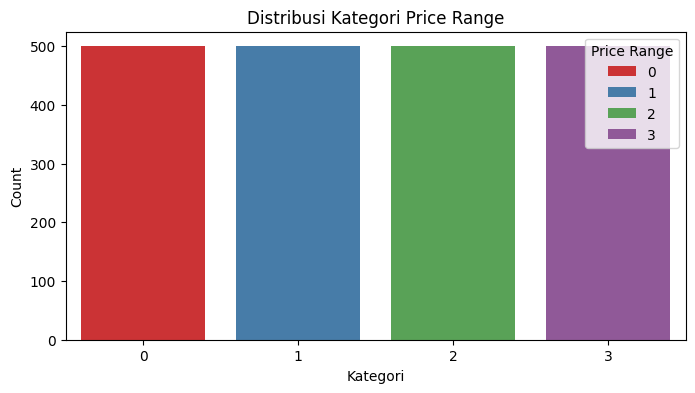

In [72]:
# melihat distribusi data pada target
jenis = len(train_data['price_range'].value_counts())
count = train_data['price_range'].value_counts()
for i in range(jenis):
    print(f'Price Range {i} : ',count[i] )

fig , ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=count.index, y=count, palette='Set1', hue = count.index)
plt.title('Distribusi Kategori Price Range')
plt.legend(title = 'Price Range')
plt.xlabel('Kategori')
plt.ylabel('Count')
plt.show()

Distribusi pada label menampilkan data sudah balance maka tidak perlu melakukan oversampling ataupun undersampling

### Removing Outliers
- Detect Outliers
- IQR

## Outliers

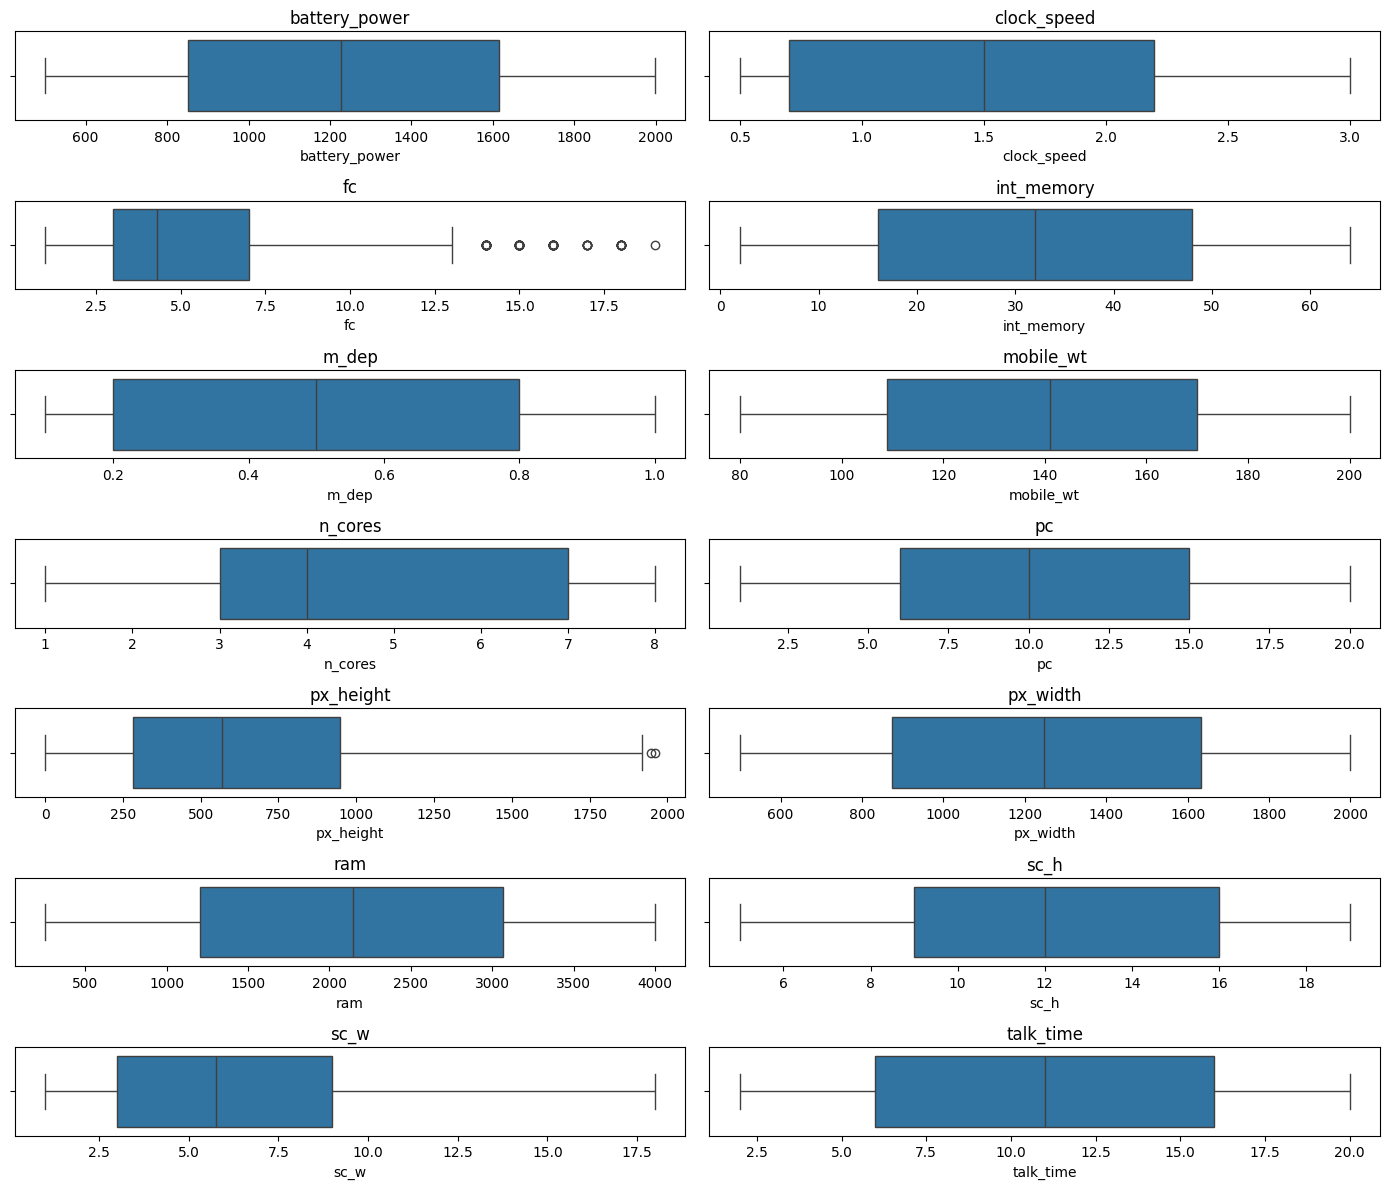

In [73]:
fig, axes = plt.subplots(7, 2, figsize=(14, 12))

for i, feature in enumerate(train_data[numerical]):
    r = i // 2
    c = i % 2
    sns.boxplot(data=train_data, x=feature, ax=axes[r, c])
    axes[r, c].set_title(feature)

plt.tight_layout()
plt.show()

## IQR

implementasi teknik IQR pada data numerik

In [74]:
# menghapus outliers
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)

IQR = Q3 - Q1

new_data = train_data[~((train_data[numerical]<(Q1 - 1.5*IQR))|(train_data[numerical]>(Q3 + 1.5*IQR))).any(axis=1)]

new_data.shape

<ipython-input-74-90c8e1361143>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  new_data = train_data[~((train_data[numerical]<(Q1 - 1.5*IQR))|(train_data[numerical]>(Q3 + 1.5*IQR))).any(axis=1)]


(1913, 21)

## Univariate Analysis

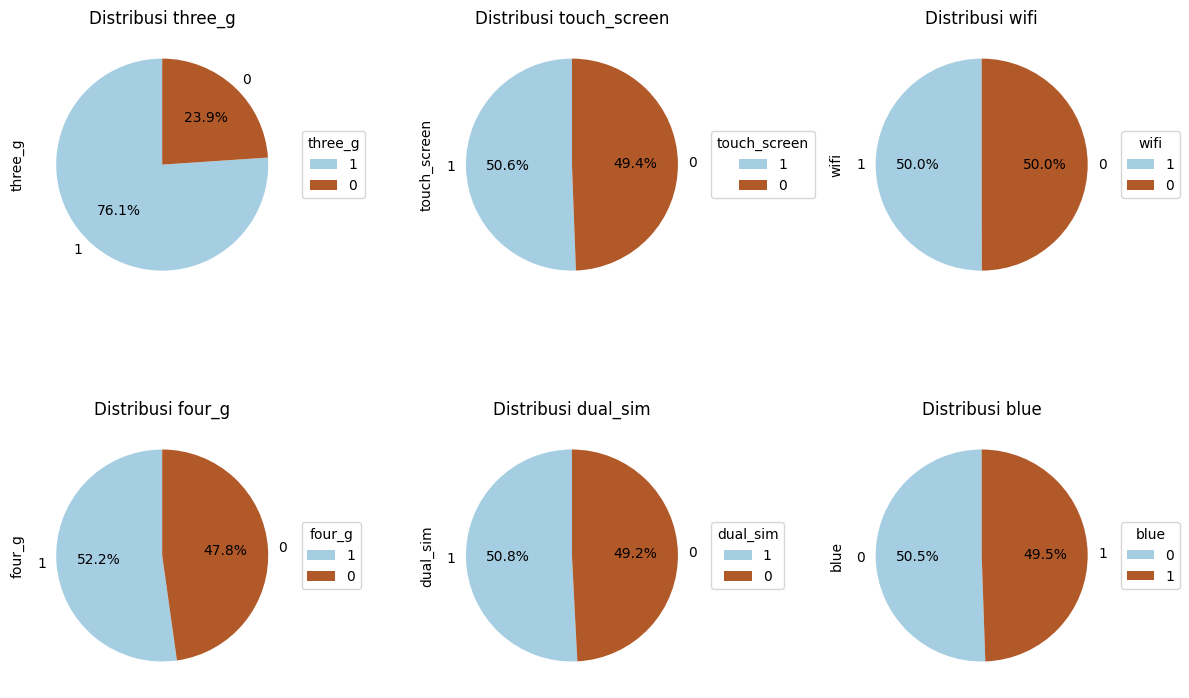

In [75]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, feature in enumerate(categorical[:-1]):
  r = i // 3
  c = i % 3
  count = new_data[feature].value_counts()

  count.plot(kind='pie', ax=axes[r, c], autopct='%1.1f%%', startangle=90, cmap='Paired')
  axes[r,c].set_title(f'Distribusi {feature}')
  axes[r,c].legend(title=feature, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

Dari grafik diatas menunjukkan tiap tiap feature memiliki dsitribusi data yang seimbang atau hampir seimbang kecuali pada 'three_g', sehingga dapat disimpulkan bahwa hanya sebagian kecil handphone yang tidak support 3G

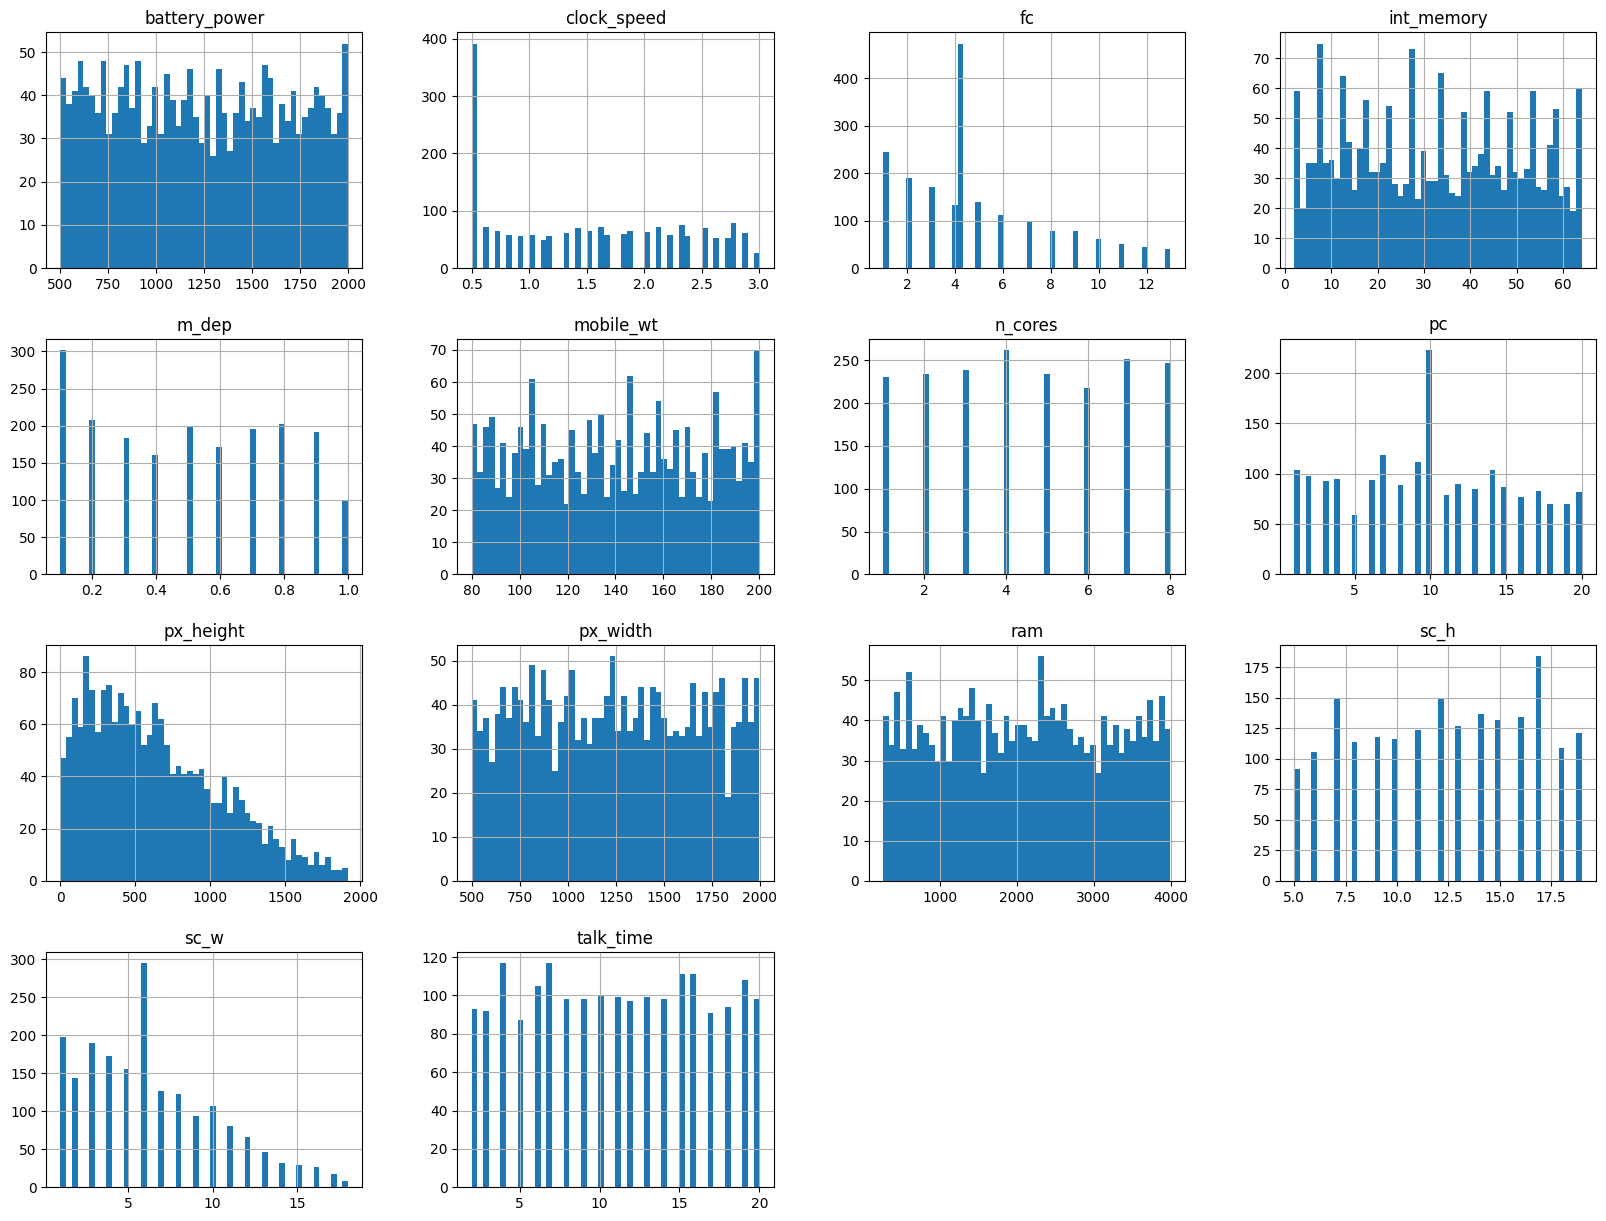

In [76]:
# histogram numerik feature
new_data[numerical].hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix ')

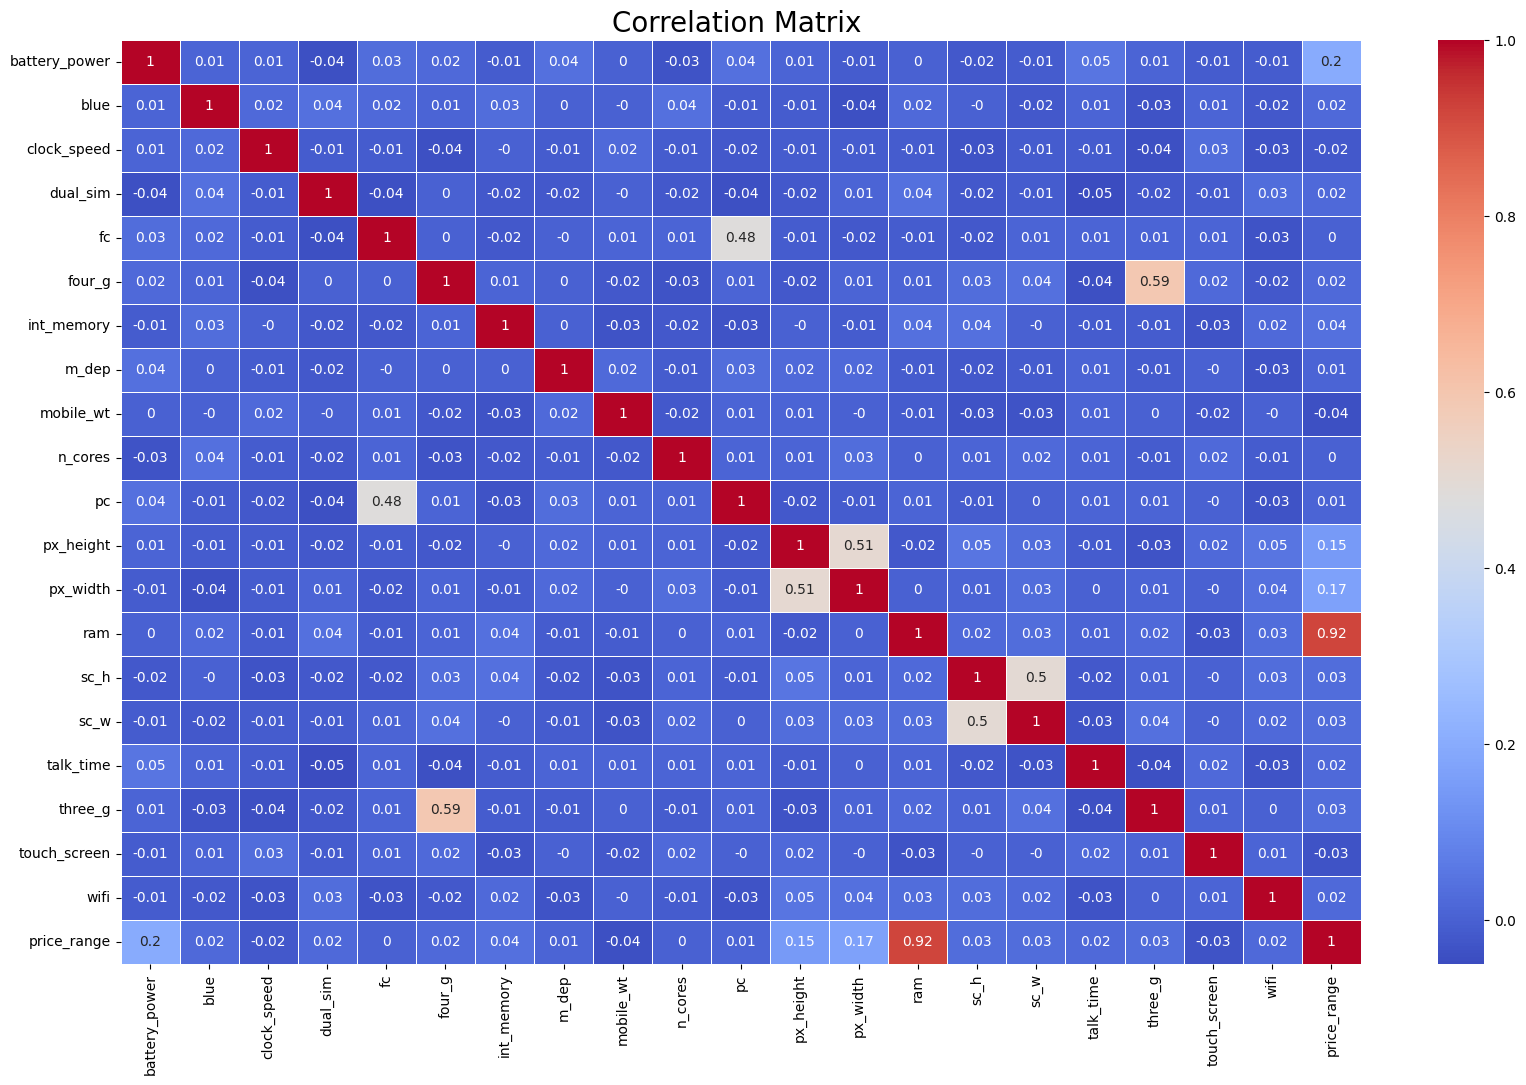

In [77]:
plt.figure(figsize=(20, 12))
correlation_matrix = new_data.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix ", size=20)

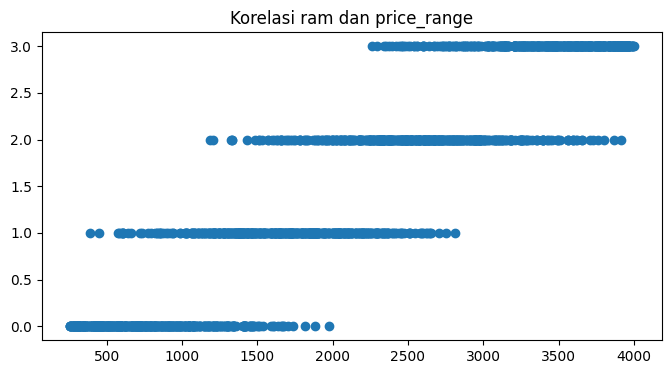

In [78]:
# Viiualisasi korelasi ram dan price_range
plt.figure(figsize = (8,4))
plt.scatter(x = new_data['ram'], y = new_data['price_range'])
plt.title('Korelasi ram dan price_range')
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa semakin tinggi kategori price_range maka hp tersebut meiliki kapasitas ram yang besar, dan juga sebaliknya. Hp yang memiliki kapasitas ram kecil maka akan masuk ke kategori price_range yang rendah

# Data Preparation

- Split Data
- Normalization

## Split Data

In [79]:
x = new_data.iloc[:, :-1]
y = new_data['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=42)

In [80]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1721, 20)
(1721,)
(192, 20)
(192,)


## Normalization

In [81]:
scaler = MinMaxScaler()
x_train[numerical] = scaler.fit_transform(x_train[numerical])
x_test[numerical] = scaler.fit_transform(x_test[numerical])
x_train[numerical].describe().round(4)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000,1721.0000
mean,0.4925,0.4091,0.3183,0.4874,0.4450,0.5016,0.5022,0.4729,0.3349,0.5033,0.5026,0.5258,0.3143,0.5023
std,0.2938,0.3264,0.2493,0.2915,0.3207,0.2951,0.3268,0.2875,0.2319,0.2901,0.2900,0.3004,0.2334,0.3023
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.2331,0.0800,0.1667,0.2258,0.1111,0.2417,0.2857,0.2632,0.1439,0.2497,0.2580,0.2857,0.1176,0.2222
50%,0.4870,0.4000,0.2758,0.4839,0.4444,0.5083,0.4286,0.4693,0.2883,0.5020,0.5118,0.5000,0.2804,0.5000
75%,0.7415,0.6800,0.4167,0.7419,0.7778,0.7500,0.8571,0.6842,0.4932,0.7590,0.7527,0.7857,0.4706,0.7778
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Create Model

- KNN
- RandomForest
- AdaBoost

## GridSearch

In [82]:
KNN = KNeighborsClassifier()
RF = RandomForestClassifier()
Boost = AdaBoostClassifier()

def best_param(x, y):
  algorithms = {
        'knn': {
            'model': KNN,
            'params': {
                'n_neighbors': range(1,20),
            }
        },
        'boosting': {
            'model': Boost,
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'algorithm' : ['SAMME', 'SAMME.R'],
                'random_state': [11, 33, 55, 77]
            }
        },
        'random_forest': {
            'model': RF,
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [None, 10, 20],
                'random_state': [11, 33, 55, 77],
            }
        }

    }

  scores = []
  for algo_name, config in algorithms.items():
      gs =  GridSearchCV(config['model'], config['params'], cv=10, return_train_score=False)
      gs.fit(x,y)
      scores.append({
          'model': algo_name,
          'best_score': gs.best_score_,
          'best_params': gs.best_params_
      })

  return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_param(x,y)

,model,best_score,best_params
0,knn,0.934642,{'n_neighbors': 11}
1,boosting,0.741260,"{'algorithm': 'SAMME', 'learning_rate': 0.1, '..."
2,random_forest,0.881329,"{'max_depth': None, 'n_estimators': 75, 'rando..."


# Evaluation

In [83]:
# implementasi best param
KNN = KNeighborsClassifier(n_neighbors = 11)
RF = RandomForestClassifier(max_depth = None, n_estimators= 75, random_state = 55)
Boost = AdaBoostClassifier(algorithm= 'SAMME', learning_rate = 0.1, n_estimators = 100, random_state = 11)

acc = pd.DataFrame(index = ['accuracy'], columns = ['KNN', 'RandomForest', 'Boosting'])

In [84]:
# Model KNN accuracy
KNN.fit(x_train, y_train)
acc.loc['accuracy', 'KNN'] = KNN.score(x_test,y_test)

# Model RandomForest accuracy
RF.fit(x_train, y_train)
acc.loc['accuracy', 'RandomForest'] = RF.score(x_test,y_test)

# Model AdaBoost accuracy
Boost.fit(x_train, y_train)
acc.loc['accuracy', 'Boosting'] = Boost.score(x_test,y_test)

acc

,KNN,RandomForest,Boosting
accuracy,0.411458,0.890625,0.75


In [85]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': KNN, 'RF': RF, 'Boosting': Boost}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))/1e3

mse

,train,test
KNN,0.000667,0.000917
RF,0.0,0.000109
Boosting,0.000256,0.00025


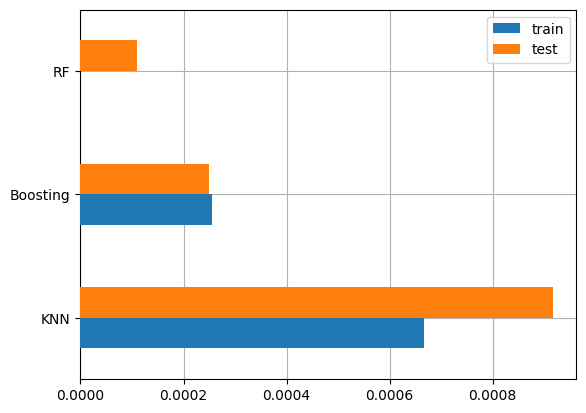

In [86]:
fig, ax = plt.subplots()
mse.sort_values(by = 'test', ascending = 0).plot(kind = 'barh', ax=ax, zorder=3)
ax.grid()

Dari hasil evaluasi model diatas dapat disimpulkan bahwa algoritma **Random Forest** memiliki tingkat accuracy yang tinggi dan nilai error yang kecil daripada algoritma KNN atau AdaBoost, maka dari itu kita dapat menggunakan model dengan algoritma **Random Forest** untuk prediksi pada data test

# Prediction pada Data Test

In [87]:
# Normalisasi data
test_data.drop('id', inplace = True, axis = 1)
test_data[numerical] = scaler.transform(test_data[numerical])

In [88]:
# Prediksi
y_pred = RF.predict(test_data)
df_pred = pd.DataFrame(y_pred)

test_n_data = pd.read_csv('test.csv')
test_n_data['price_range'] = df_pred
test_n_data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,2
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2


In [89]:
# simpan hasil prediksi ke excel
test_n_data.to_csv('prediction.csv', index = False)